# Problem 1: Linear Regression

You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

## Load library and import data

In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df1=pd.read_csv("cubic_zirconia.csv")

## EDA

In [3]:
df1.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df1.shape

(26967, 11)

The dataset has 26967 rows and 11 columns (10 independent variables and 1 dependent)

In [5]:
df1=df1.drop('Unnamed: 0', axis=1)

In [6]:
df1.head(2)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [8]:
df1.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [9]:
for column in df1.columns:
    if df1[column].dtype == 'object':
        print(column.upper(),': ',df1[column].nunique())
        print(df1[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




## Checking for Missing and duplicate values

In [10]:
# Are there any missing values ?

df1.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

## Imputing missing values

In [11]:
mean = df1['depth'].mean()
df1['depth'] = df1['depth'].fillna(mean)  
df1.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Checking for inconsistencies

In [12]:
df1[df1.carat==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [13]:
df1[df1.depth==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [14]:
df1[df1.x==0]

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
6215,0.71,Good,F,SI2,64.1,60.0,0.0,0.0,0.0,2130
17506,1.14,Fair,G,VS1,57.5,67.0,0.0,0.0,0.0,6381


In [15]:
df1[df1.price==0]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [16]:
df1.x=df1.x.replace(to_replace=0,value=np.nan)

In [17]:
df1.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          3
y          0
z          0
price      0
dtype: int64

In [18]:
df1 = df1.dropna()  
df1.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

## Are there any duplicates ?

In [19]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df1[dups].head()

Number of duplicate rows = 33


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


There are Duplicates and we'll remove these duplicates

## Removing Duplicates

In [20]:
df1.drop_duplicates(inplace=True) 

In [21]:
dups = df1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('shape after removing:',df1.shape)

Number of duplicate rows = 0
shape after removing: (26931, 10)


In [22]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

## Outlier Checks

Shape before Outliers Treatment (26931, 10)


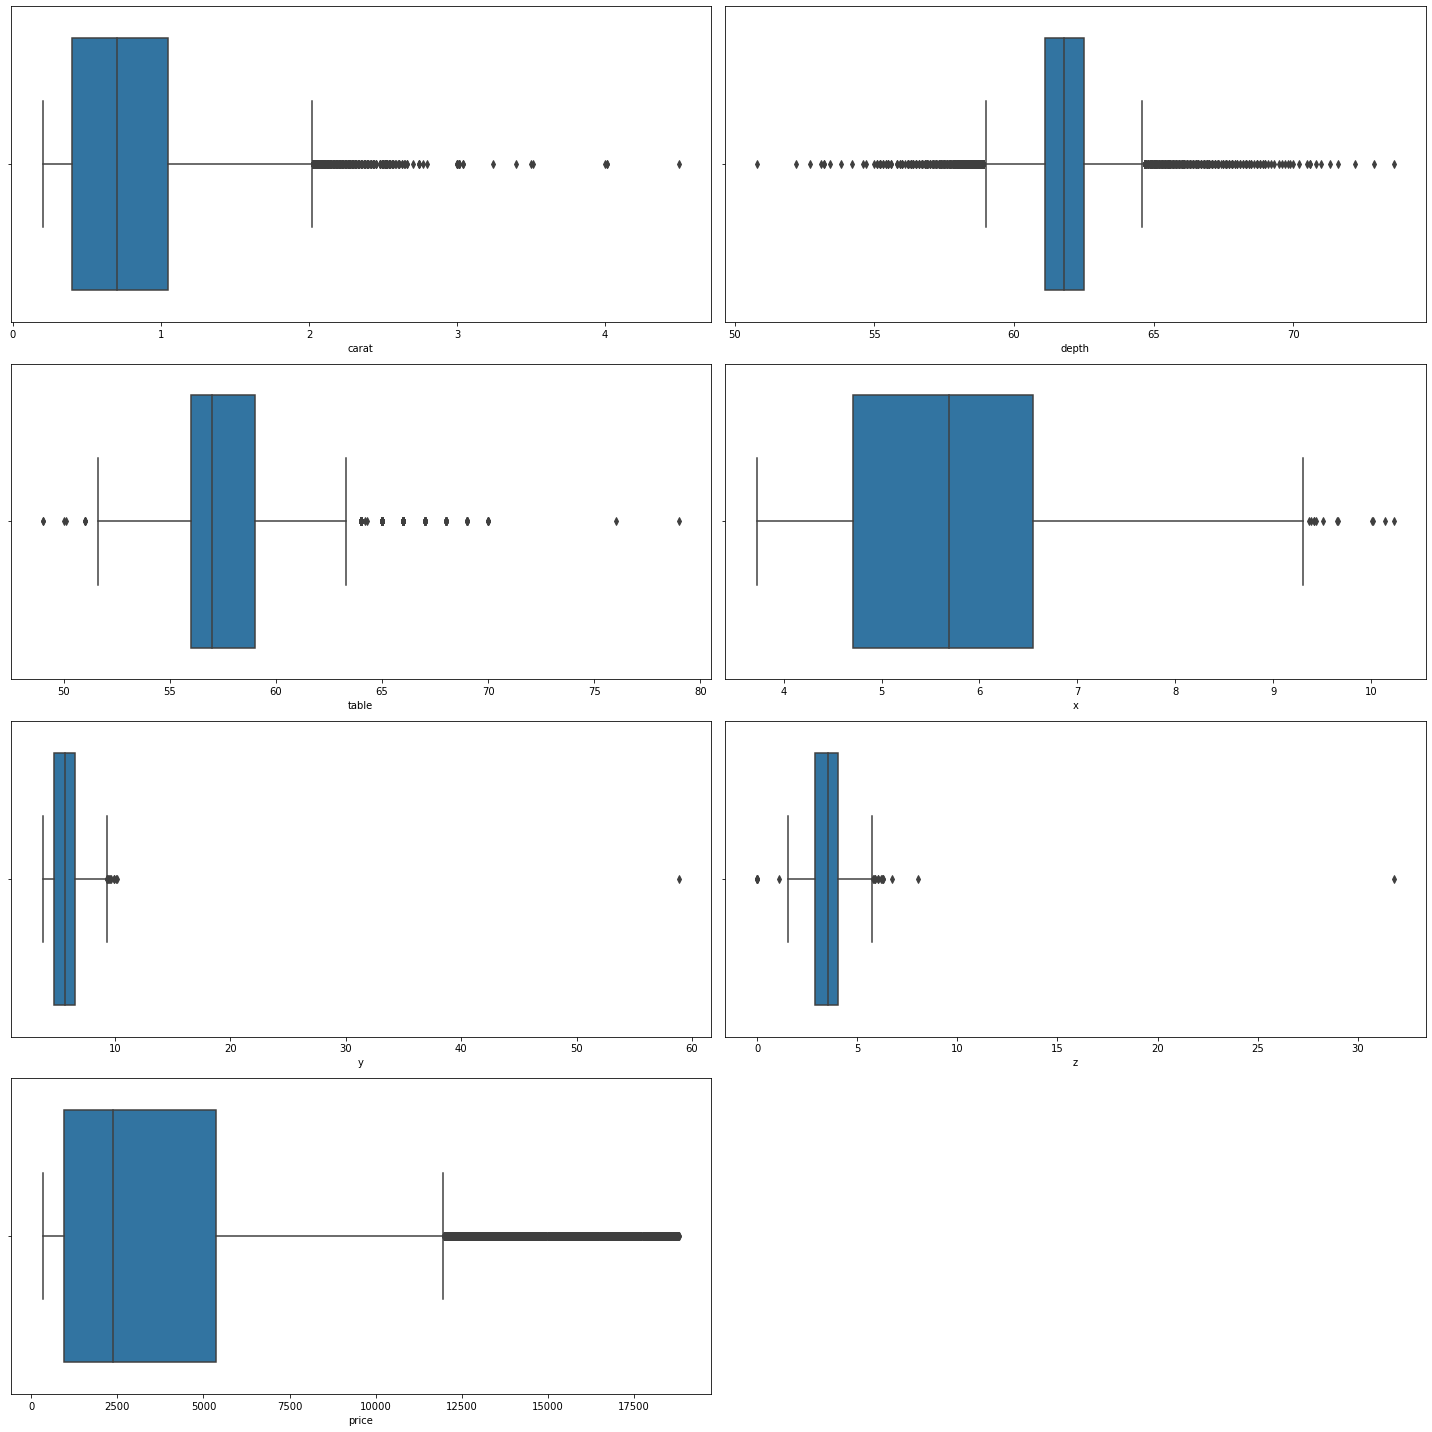

In [23]:
data_plot1=df1[['carat', 'depth', 'table', 'x', 'y', 'z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot1.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot1[data_plot1.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df1.shape)

Outliers are present, which we can replace by max/min limit 

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
lr,ur=remove_outlier(df1['carat'])
df1['carat']=np.where(df1['carat']>ur,ur,df1['carat'])
df1['carat']=np.where(df1['carat']<lr,lr,df1['carat'])

In [26]:
lr,ur=remove_outlier(df1['depth'])
df1['depth']=np.where(df1['depth']>ur,ur,df1['depth'])
df1['depth']=np.where(df1['depth']<lr,lr,df1['depth'])

In [27]:
lr,ur=remove_outlier(df1['table'])
df1['table']=np.where(df1['table']>ur,ur,df1['table'])
df1['table']=np.where(df1['table']<lr,lr,df1['table'])

In [28]:
lr,ur=remove_outlier(df1['x'])
df1['x']=np.where(df1['x']>ur,ur,df1['x'])
df1['x']=np.where(df1['x']<lr,lr,df1['x'])

In [29]:
lr,ur=remove_outlier(df1['y'])
df1['y']=np.where(df1['y']>ur,ur,df1['y'])
df1['y']=np.where(df1['y']<lr,lr,df1['y'])

In [30]:
lr,ur=remove_outlier(df1['z'])
df1['z']=np.where(df1['z']>ur,ur,df1['z'])
df1['z']=np.where(df1['z']<lr,lr,df1['z'])

In [31]:
lr,ur=remove_outlier(df1['price'])
df1['price']=np.where(df1['price']>ur,ur,df1['price'])
df1['price']=np.where(df1['price']<lr,lr,df1['price'])

Shape before Outliers Treatment (26931, 10)


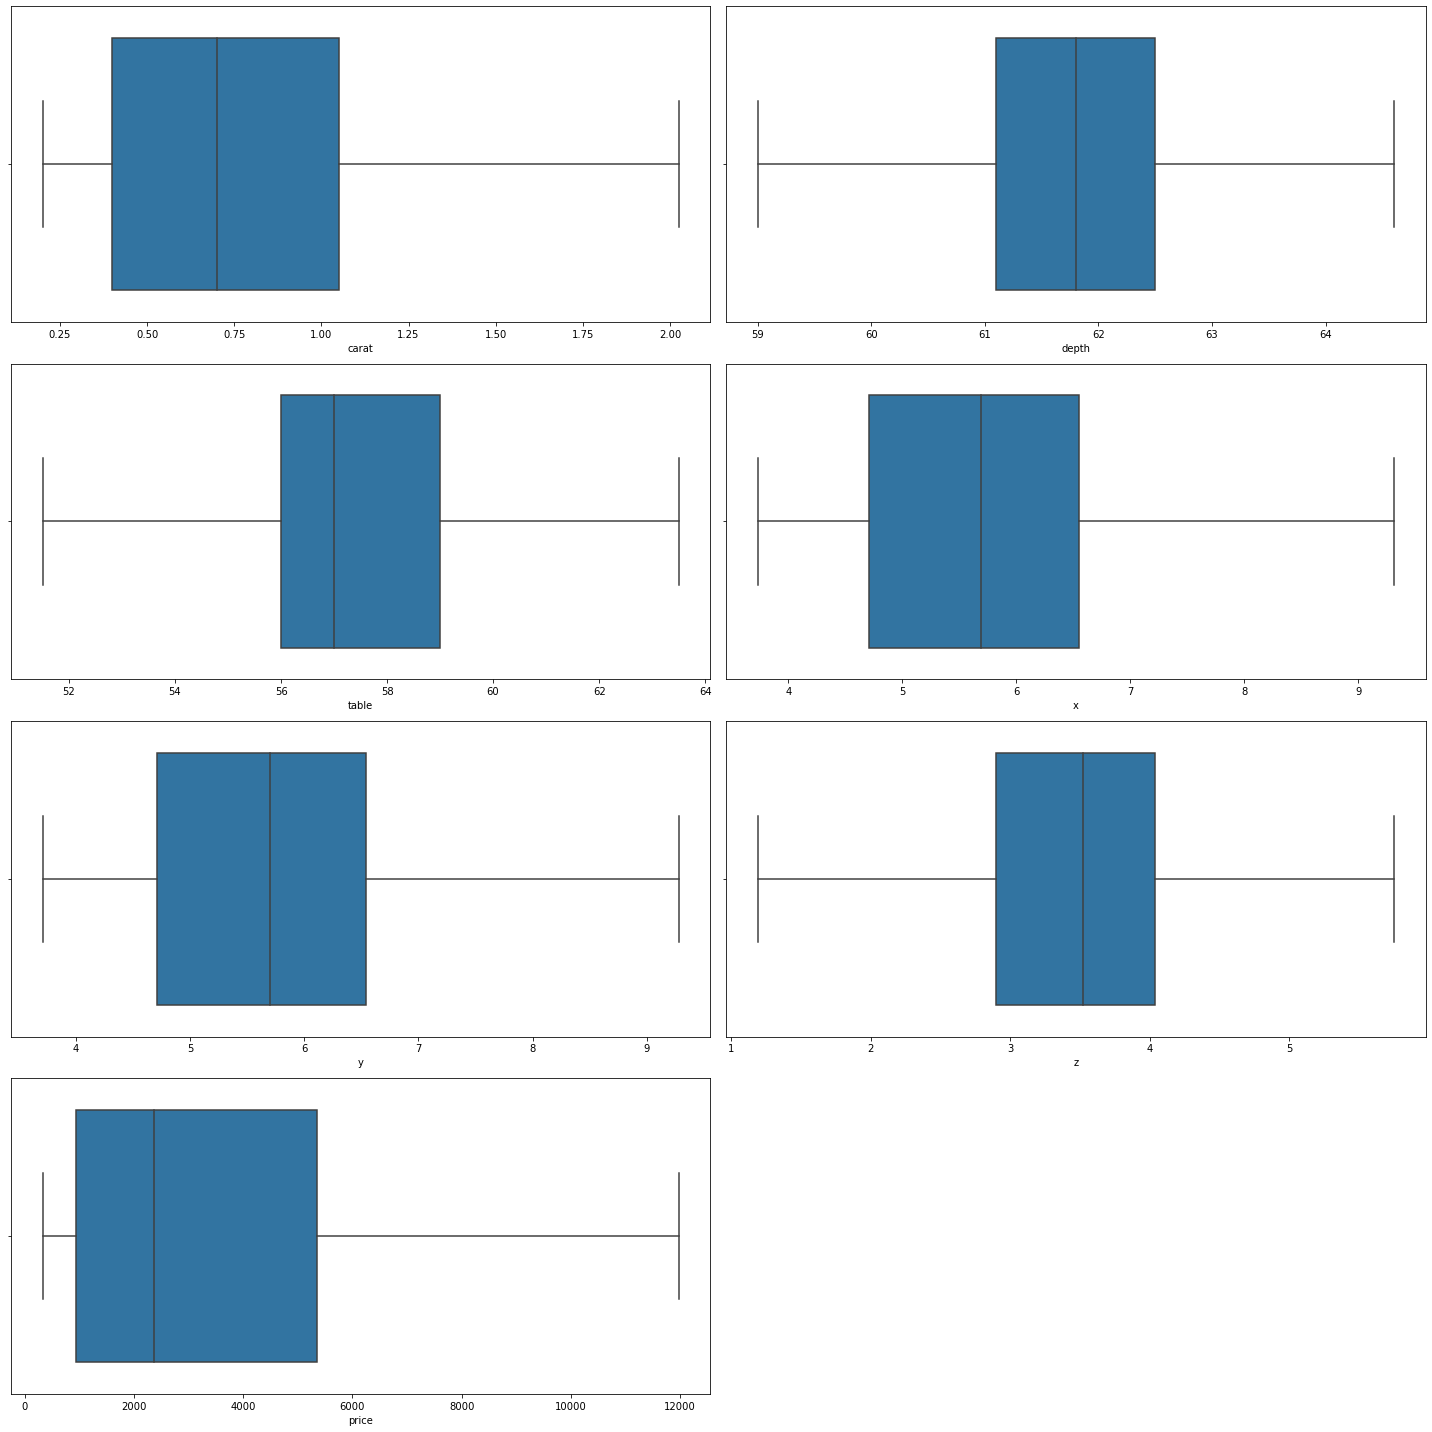

In [32]:
data_plot1=df1[['carat', 'depth', 'table', 'x', 'y', 'z','price']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot1.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot1[data_plot1.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df1.shape)

## Encoding

In [33]:
df1cat=df1[['cut', 'color', 'clarity']]
df1num=df1[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]
for feature in df1cat.columns: 
    if df1cat[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1cat[feature].unique()))
        print(pd.Categorical(df1cat[feature].unique()).codes)
        df1cat[feature] = pd.Categorical(df1cat[feature]).codes



feature: cut
[Ideal, Premium, Very Good, Good, Fair]
Categories (5, object): [Fair, Good, Ideal, Premium, Very Good]
[2 3 4 1 0]


feature: color
[E, G, F, D, H, J, I]
Categories (7, object): [D, E, F, G, H, I, J]
[1 3 2 0 4 6 5]


feature: clarity
[SI1, IF, VVS2, VS1, VVS1, VS2, SI2, I1]
Categories (8, object): [I1, IF, SI1, SI2, VS1, VS2, VVS1, VVS2]
[2 1 7 4 6 5 3 0]


<ipython-input-33-32f266b76a67>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1cat[feature] = pd.Categorical(df1cat[feature]).codes


## Data Distribution

In [34]:
df1cat.head()

,cut,color,clarity
0,2,1,2
1,3,3,1
2,4,1,7
3,2,2,4
4,2,2,6


After Outliers Treatment


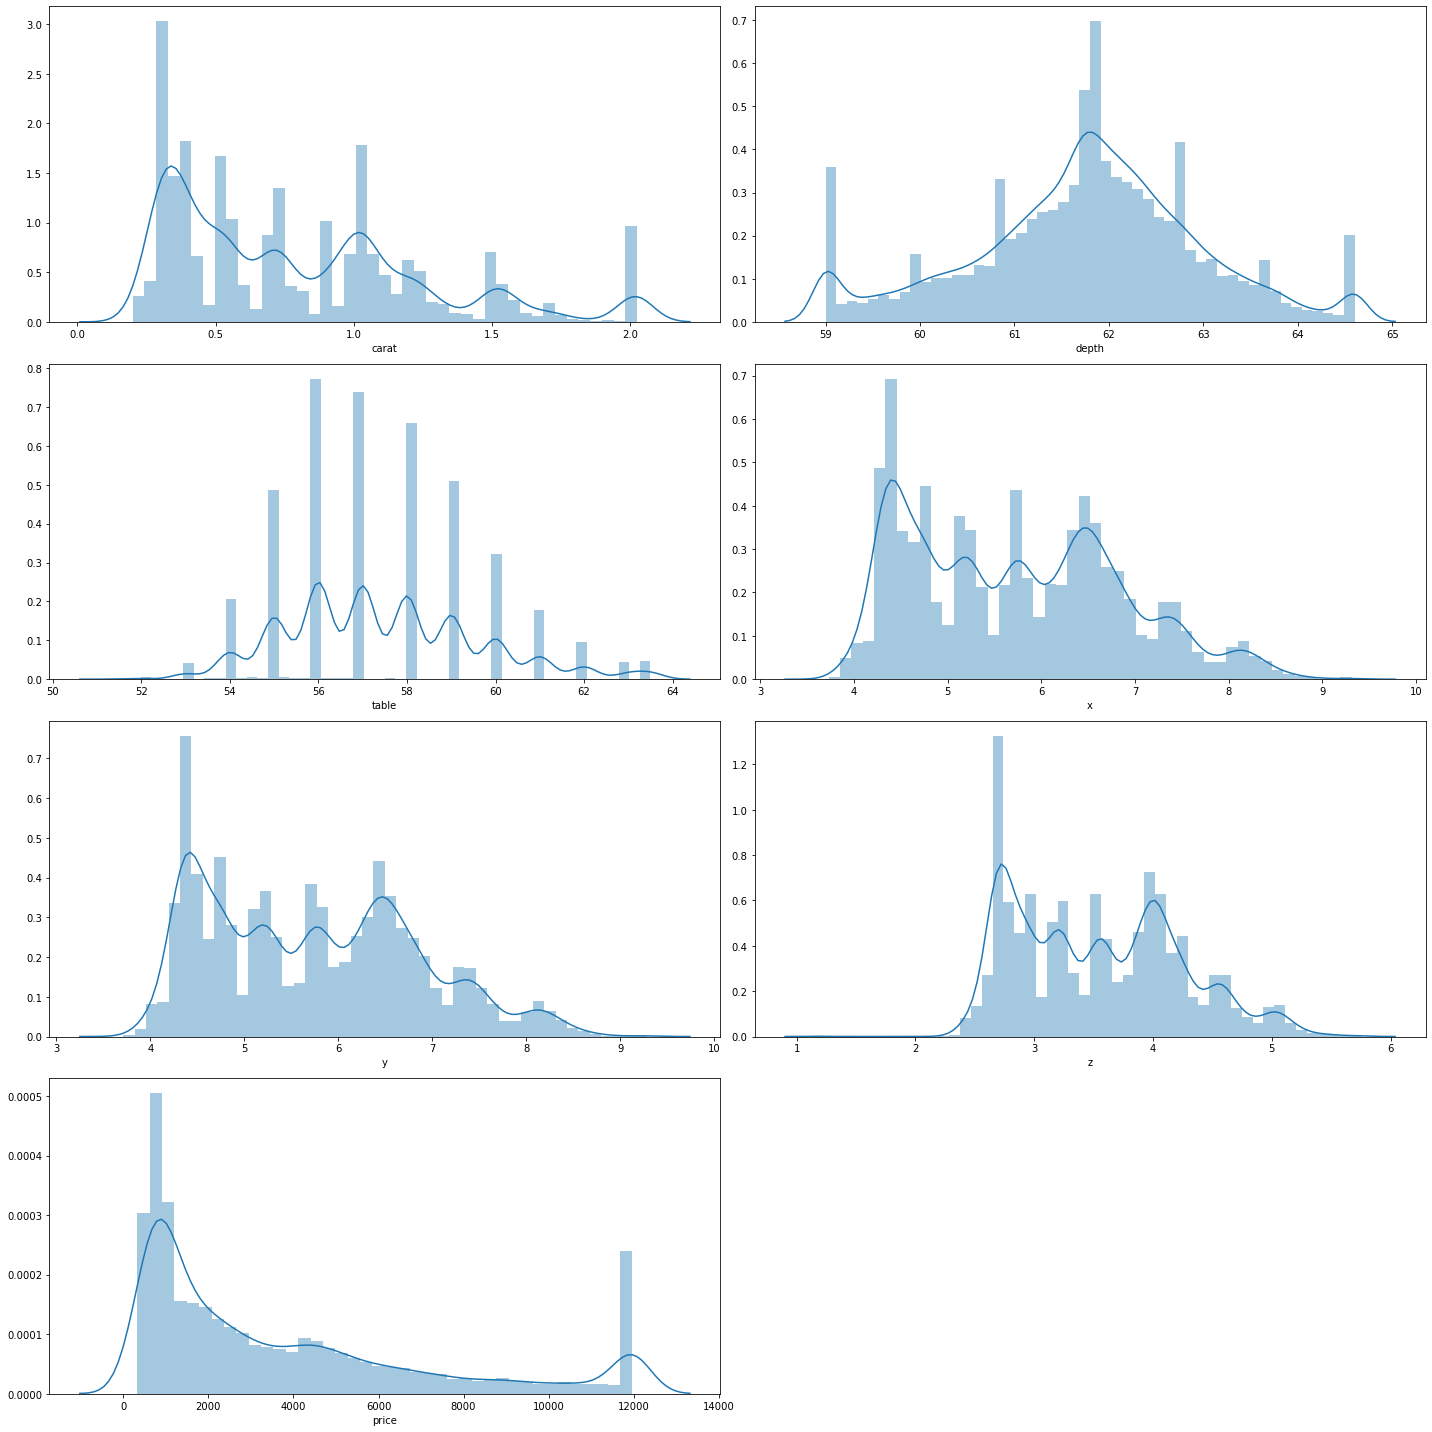

In [35]:
data_plot2=df1num
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.distplot(data_plot2[data_plot2.columns[i]])
    plt.tight_layout()
print('After Outliers Treatment')

Pairplot for numerical variables above

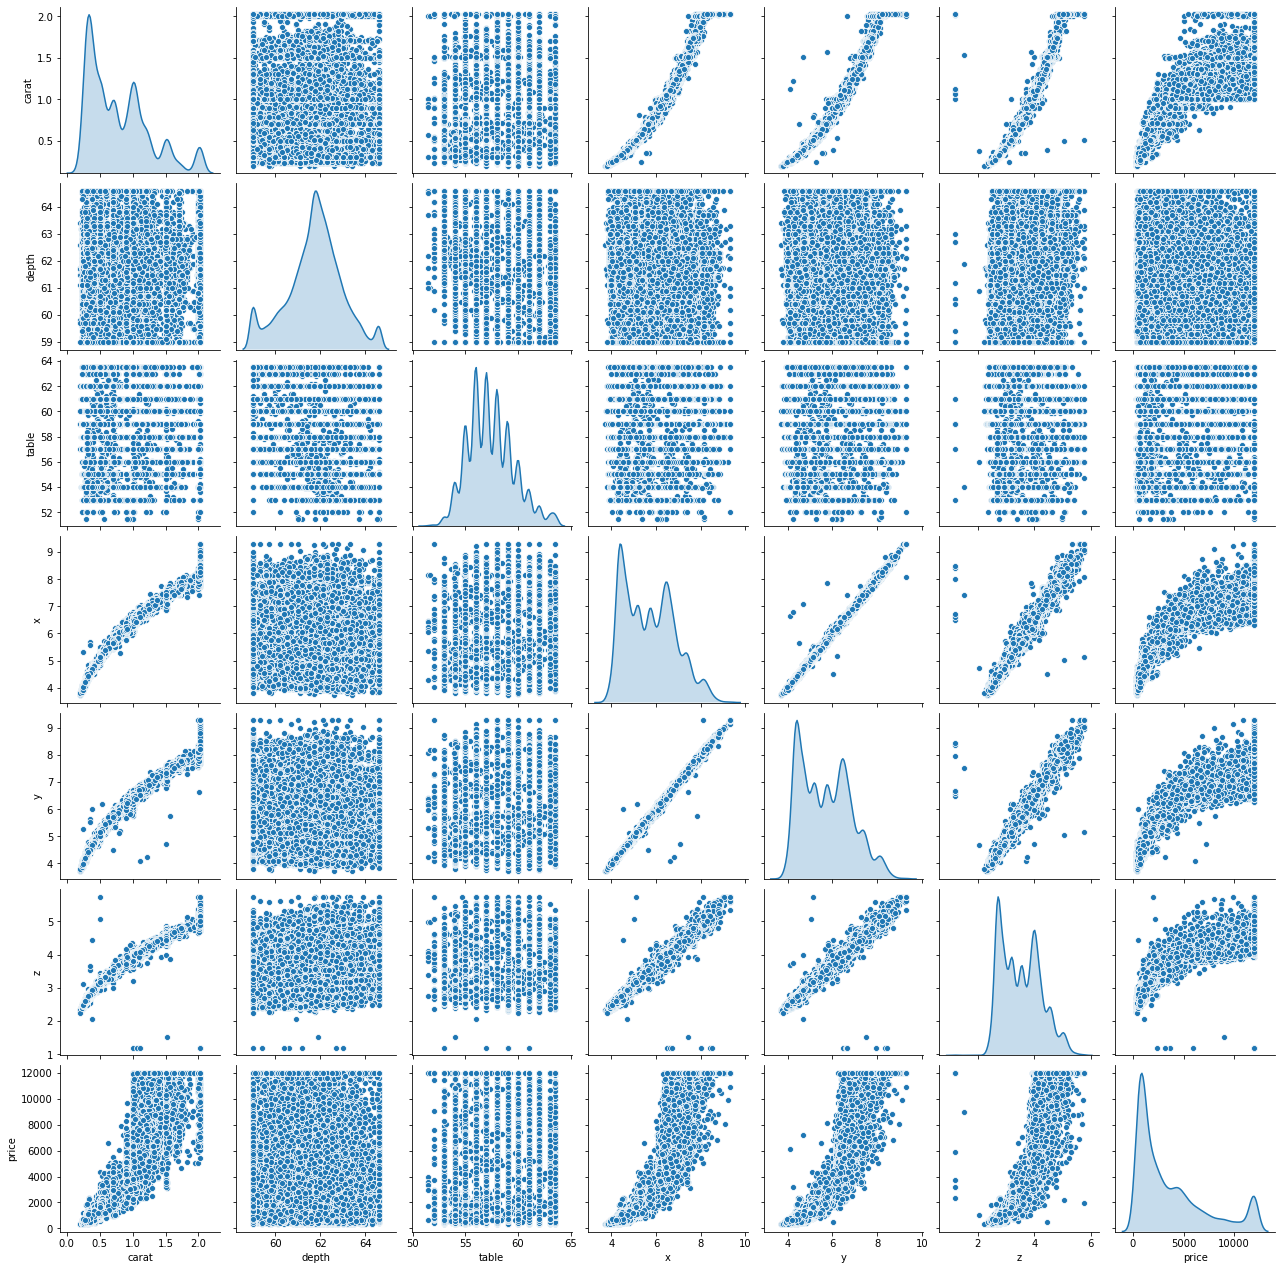

In [36]:
sns.pairplot(df1num, diag_kind='kde')  
plt.show()

In [37]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

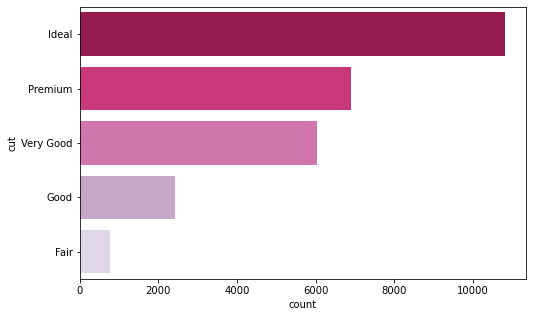

In [38]:
plt.figure(figsize=(8,5))
sns.countplot(y=(df1.cut),palette='PuRd_r')

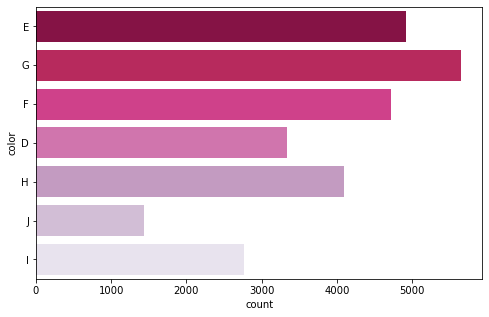

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(y=(df1.color),palette='PuRd_r')

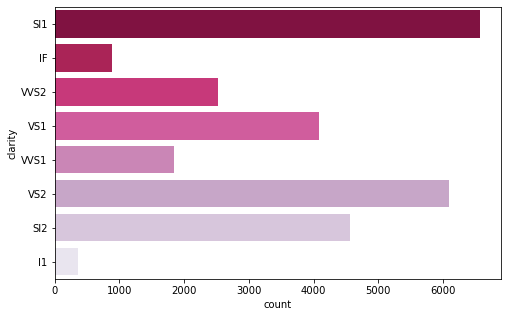

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(y=(df1.clarity),palette='PuRd_r')

## Checking for Correlations¶

In [41]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

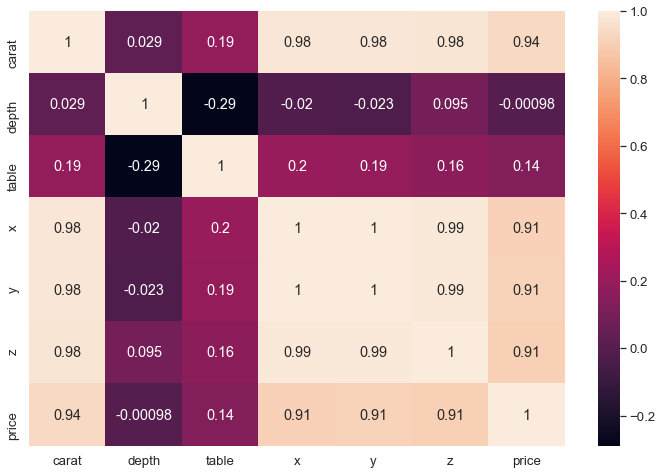

In [42]:
# construct heatmap with only continuous variables
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.heatmap(df1num.corr(), annot=True)

There is a high postive correlation among variables such as 'x', 'y', 'z','price' and small negative correlations among others

## Scaling and Train-Test Split

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
SS = StandardScaler()

In [45]:
scaled_df1num = SS.fit_transform(df1num)
scaled_df1num = pd.DataFrame(scaled_df1num, index=df1num.index, columns=df1num.columns)
scaled_df1num.head()

,carat,depth,table,x,y,z,price
0,-1.067422,0.288053,0.261860,-1.296590,-1.289737,-1.259350,-0.933301
1,-1.002505,-0.778984,0.261860,-1.163343,-1.137638,-1.201918,-0.793452
2,0.230914,0.370133,1.189166,0.275730,0.347562,0.348755,0.736237
3,-0.807755,-0.122346,-0.665445,-0.808016,-0.833441,-0.828608,-0.765194
4,-1.045783,-1.107304,0.725513,-1.225525,-1.164479,-1.273708,-0.852563


In [46]:
df1cat = pd.DataFrame(df1cat, index=df1cat.index, columns=df1cat.columns)
df1cat.head()

,cut,color,clarity
0,2,1,2
1,3,3,1
2,4,1,7
3,2,2,4
4,2,2,6


In [47]:
scaled_df1 = pd.concat([df1cat, scaled_df1num], axis=1)
scaled_df1.head

<bound method NDFrame.head of        cut  color  clarity     carat     depth     table         x         y  \
0        2      1        2 -1.067422  0.288053  0.261860 -1.296590 -1.289737   
1        3      3        1 -1.002505 -0.778984  0.261860 -1.163343 -1.137638   
2        4      1        7  0.230914  0.370133  1.189166  0.275730  0.347562   
3        2      2        4 -0.807755 -0.122346 -0.665445 -0.808016 -0.833441   
4        2      2        6 -1.045783 -1.107304  0.725513 -1.225525 -1.164479   
...    ...    ...      ...       ...       ...       ...       ...       ...   
26962    3      3        2  0.685331  0.452212  0.261860  0.782070  0.705442   
26963    2      4        1 -1.002505  0.123893 -1.129098 -1.145576 -1.173426   
26964    3      1        5 -0.613004 -0.040266  0.261860 -0.541521 -0.520296   
26965    4      2        7 -1.132338  0.041814 -0.665445 -1.367655 -1.370260   
26966    3      6        2  0.988276  0.205973  0.261860  1.039682  1.027534   

         

In [48]:
scaled_df1.columns

Index(['cut', 'color', 'clarity', 'carat', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [49]:
scaled_df1 = pd.DataFrame(scaled_df1, index=scaled_df1.index, columns=scaled_df1.columns)
scaled_df1.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
0,2,1,2,-1.067422,0.288053,0.261860,-1.296590,-1.289737,-1.259350,-0.933301
1,3,3,1,-1.002505,-0.778984,0.261860,-1.163343,-1.137638,-1.201918,-0.793452
2,4,1,7,0.230914,0.370133,1.189166,0.275730,0.347562,0.348755,0.736237
3,2,2,4,-0.807755,-0.122346,-0.665445,-0.808016,-0.833441,-0.828608,-0.765194
4,2,2,6,-1.045783,-1.107304,0.725513,-1.225525,-1.164479,-1.273708,-0.852563


In [50]:
# Copy all the predictor variables into X dataframe
ssX = scaled_df1.drop('price', axis=1)

# Copy target into the y dataframe. 
ssy = scaled_df1[['price']]

In [51]:
# Split X and y into training and test set in 70:30 ratio
ssX_train, ssX_test, ssy_train, ssy_test = train_test_split(ssX, ssy, test_size=0.3 , random_state=1)

## After scaling df1

In [52]:
ssdata_train = pd.concat([ssX_train, ssy_train], axis=1)
ssdata_test=pd.concat([ssX_test,ssy_test],axis=1)
ssdata_train.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
2275,2,1,5,-1.067422,-0.450665,-1.129098,-1.225525,-1.271843,-1.273708,-0.833821
12311,2,3,4,0.944998,-0.122346,-0.201793,0.986383,1.045428,0.994868,2.053990
5030,1,1,3,0.663692,1.273010,-0.665445,0.711005,0.759124,0.880004,0.094950
8481,3,5,5,1.529249,-0.532745,1.189166,1.421658,1.456989,1.368178,1.653763
25220,4,5,3,2.665292,0.862611,1.189166,2.007947,2.074332,2.157873,2.374706


In [53]:
ssexpr= 'price ~ carat+ cut+ color+clarity+ depth+ table+ x+ y+ z'

In [54]:
import statsmodels.formula.api as smf
sslm1 = smf.ols(formula= ssexpr, data = ssdata_train).fit()
print(format(round(sslm1.params,2)))

Intercept   -0.14
carat        1.23
cut          0.01
color       -0.07
clarity      0.07
depth       -0.03
table       -0.05
x           -0.61
y            0.44
z           -0.06
dtype: float64


## sslm1.summary

In [55]:
print(sslm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.099e+04
Date:                Wed, 04 Nov 2020   Prob (F-statistic):               0.00
Time:                        00:02:19   Log-Likelihood:                -4107.3
No. Observations:               18851   AIC:                             8235.
Df Residuals:                   18841   BIC:                             8313.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1392      0.008    -16.441      0.0

In [56]:
# Calculate MSE for train
ssmsetr = np.mean((sslm1.predict(ssdata_train.drop('price',axis=1))-ssdata_train['price'])**2)
ssmsetr

0.0905266588432618

In [57]:
#Root Mean Squared Error - RMSE
np.sqrt(ssmsetr)

0.3008764843640357

In [58]:
# Calculate MSE for test
ssmsets = np.mean((sslm1.predict(ssdata_test.drop('price',axis=1))-ssdata_test['price'])**2)
ssmsets

0.08984105206618863

In [59]:
#Root Mean Squared Error - RMSE
np.sqrt(ssmsets)

0.2997349697085554

In [60]:
np.sqrt(sslm1.mse_resid) #another way

0.3009563199810008

## Final equation

In [61]:
for i,j in np.array(sslm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end='')

(-0.14) * Intercept +(1.23) * carat +(0.01) * cut +(-0.07) * color +(0.07) * clarity +(-0.03) * depth +(-0.05) * table +(-0.61) * x +(0.44) * y +(-0.06) * z +

In [62]:
ssy_pred = sslm1.predict(ssdata_test)

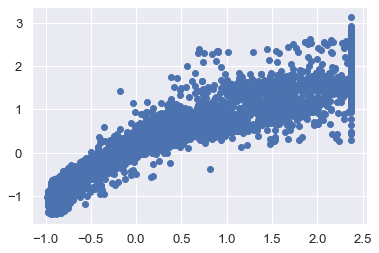

In [63]:
plt.scatter(ssdata_test['price'], ssy_pred)
plt.show()

In [64]:
vif = [variance_inflation_factor(ssX.values, ix) for ix in range(ssX.shape[1])] 

In [65]:
i=0
for column in ssX.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

cut ---> 4.393244253059092
color ---> 3.1075050075605417
clarity ---> 4.295847713212699
carat ---> 32.22638853574856
depth ---> 2.5801489452711124
table ---> 1.1792517069416346
x ---> 380.01456752002485
y ---> 366.81205340602287
z ---> 104.79386394021651


## LinearRegression function without scaling to check above results

In [66]:
unscaled_df1 = pd.concat([df1cat, df1num], axis=1)
unscaled_df1.head

<bound method NDFrame.head of        cut  color  clarity  carat  depth  table     x     y     z   price
0        2      1        2   0.30   62.1   58.0  4.27  4.29  2.66   499.0
1        3      3        1   0.33   60.8   58.0  4.42  4.46  2.70   984.0
2        4      1        7   0.90   62.2   60.0  6.04  6.12  3.78  6289.0
3        2      2        4   0.42   61.6   56.0  4.82  4.80  2.96  1082.0
4        2      2        6   0.31   60.4   59.0  4.35  4.43  2.65   779.0
...    ...    ...      ...    ...    ...    ...   ...   ...   ...     ...
26962    3      3        2   1.11   62.3   58.0  6.61  6.52  4.09  5408.0
26963    2      4        1   0.33   61.9   55.0  4.44  4.42  2.74  1114.0
26964    3      1        5   0.51   61.7   58.0  5.12  5.15  3.17  1656.0
26965    4      2        7   0.27   61.8   56.0  4.19  4.20  2.60   682.0
26966    3      6        2   1.25   62.0   58.0  6.90  6.88  4.27  5166.0

[26931 rows x 10 columns]>

In [67]:
unscaled_df1 = pd.DataFrame(unscaled_df1, index=unscaled_df1.index, columns=unscaled_df1.columns)
unscaled_df1.head()

,cut,color,clarity,carat,depth,table,x,y,z,price
0,2,1,2,0.30,62.1,58.0,4.27,4.29,2.66,499.0
1,3,3,1,0.33,60.8,58.0,4.42,4.46,2.70,984.0
2,4,1,7,0.90,62.2,60.0,6.04,6.12,3.78,6289.0
3,2,2,4,0.42,61.6,56.0,4.82,4.80,2.96,1082.0
4,2,2,6,0.31,60.4,59.0,4.35,4.43,2.65,779.0


In [68]:
# Copy all the predictor variables into X dataframe
X = unscaled_df1.drop('price', axis=1)

# Copy target into the y dataframe. 
y = unscaled_df1[['price']]

In [69]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [70]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [71]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cut is 43.41885676565535
The coefficient for color is -225.71850000913784
The coefficient for clarity is 251.1976014678478
The coefficient for carat is 9227.046878634874
The coefficient for depth is -97.19552592061585
The coefficient for table is -73.92168040739303
The coefficient for x is -1879.3332650774246
The coefficient for y is 1358.7998834384352
The coefficient for z is -274.8882610734986


In [72]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 10132.82921682273


In [73]:
# R square on training data
regression_model.score(X_train, y_train)

0.9093144969532128

In [74]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9105216499027525

In [75]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

1043.4470211464966

In [76]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

1039.4882203469826

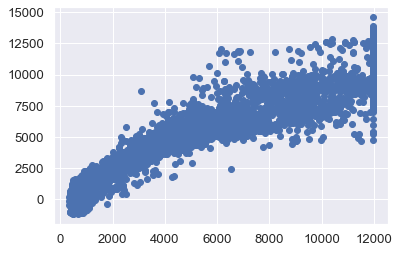

In [77]:
plt.scatter(y_test['price'], predicted_test)
plt.show()

# Problem Statement 2
You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

## Importing all required Libraries

In [78]:
from sklearn.linear_model import LogisticRegression
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

## Loading the Data

In [79]:
df2 = pd.read_csv("Holiday_Package.csv").drop('Unnamed: 0',axis=1)

## Checking the data

In [80]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [81]:
df2.shape

(872, 7)

In [82]:
df2.Holliday_Package.value_counts(normalize = True)*100

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64

In [83]:
df2.foreign.value_counts(normalize = True)*100

no     75.229358
yes    24.770642
Name: foreign, dtype: float64

In [84]:
df2.educ.value_counts(bins=2, sort=False, normalize = True)*100

(0.979, 11.0]    74.311927
(11.0, 21.0]     25.688073
Name: educ, dtype: float64

In [85]:
df2.no_young_children.value_counts(normalize = True)*100

0    76.261468
1    16.857798
2     6.307339
3     0.573394
Name: no_young_children, dtype: float64

In [86]:
df2.no_older_children.value_counts(normalize = True)*100

0    45.068807
2    23.853211
1    22.706422
3     6.307339
4     1.605505
6     0.229358
5     0.229358
Name: no_older_children, dtype: float64

In [87]:
df2.age.value_counts(bins=4, sort=False)
#, normalize = True)*100

(19.956999999999997, 30.5]    183
(30.5, 41.0]                  309
(41.0, 51.5]                  239
(51.5, 62.0]                  141
Name: age, dtype: int64

In [88]:
df2.age.value_counts(bins=4, sort=False, normalize = True)*100

(19.956999999999997, 30.5]    20.986239
(30.5, 41.0]                  35.435780
(41.0, 51.5]                  27.408257
(51.5, 62.0]                  16.169725
Name: age, dtype: float64

In [89]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


## Check for missing value in any column

In [90]:
# Are there any missing values ?
df2.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

## Summary of the data

In [91]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [92]:
df2.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


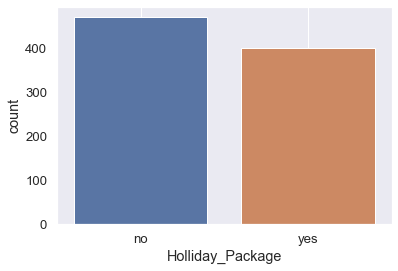

In [93]:
sns.countplot(df2.Holliday_Package)
plt.grid()
plt.show()

## Geting unique counts of Variables

In [94]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [95]:
for column in df2[['Holliday_Package', 'educ', 'no_young_children',
       'no_older_children', 'foreign' ]]:
    print(column.upper(),': ',df2[column].nunique())
    print(df2[column].value_counts().sort_values())
    print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


EDUC :  20
1       1
21      1
18      1
19      2
17      3
2       6
16     10
3      11
15     15
6      21
14     25
7      31
13     43
4      50
5      67
10     90
11    100
9     114
12    124
8     157
Name: educ, dtype: int64


NO_YOUNG_CHILDREN :  4
3      5
2     55
1    147
0    665
Name: no_young_children, dtype: int64


NO_OLDER_CHILDREN :  7
6      2
5      2
4     14
3     55
1    198
2    208
0    393
Name: no_older_children, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [96]:
print('Shape: ',df2.shape)

Shape:  (872, 7)


## Check for duplicate data

In [97]:
# Are there any duplicates ?
dups = df2.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df2[dups]

Number of duplicate rows = 0


,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


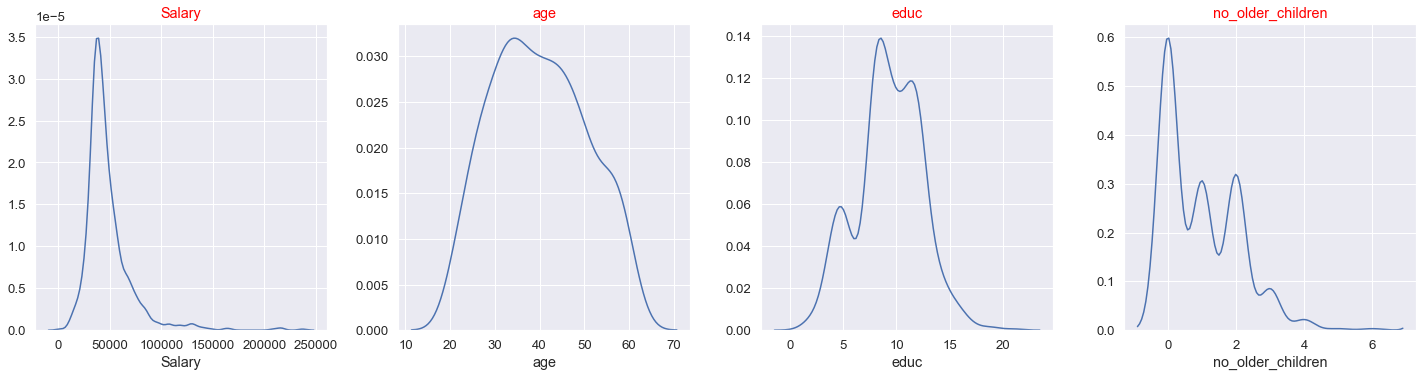

In [98]:
data_plot=df2[['Salary', 'age', 'educ',  'no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False)
    ax.set_title(data_plot.columns[i],color='Red')
plt.tight_layout()
plt.show()

## Checking for outliers

In [99]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

Shape before Outliers Treatment (872, 7)


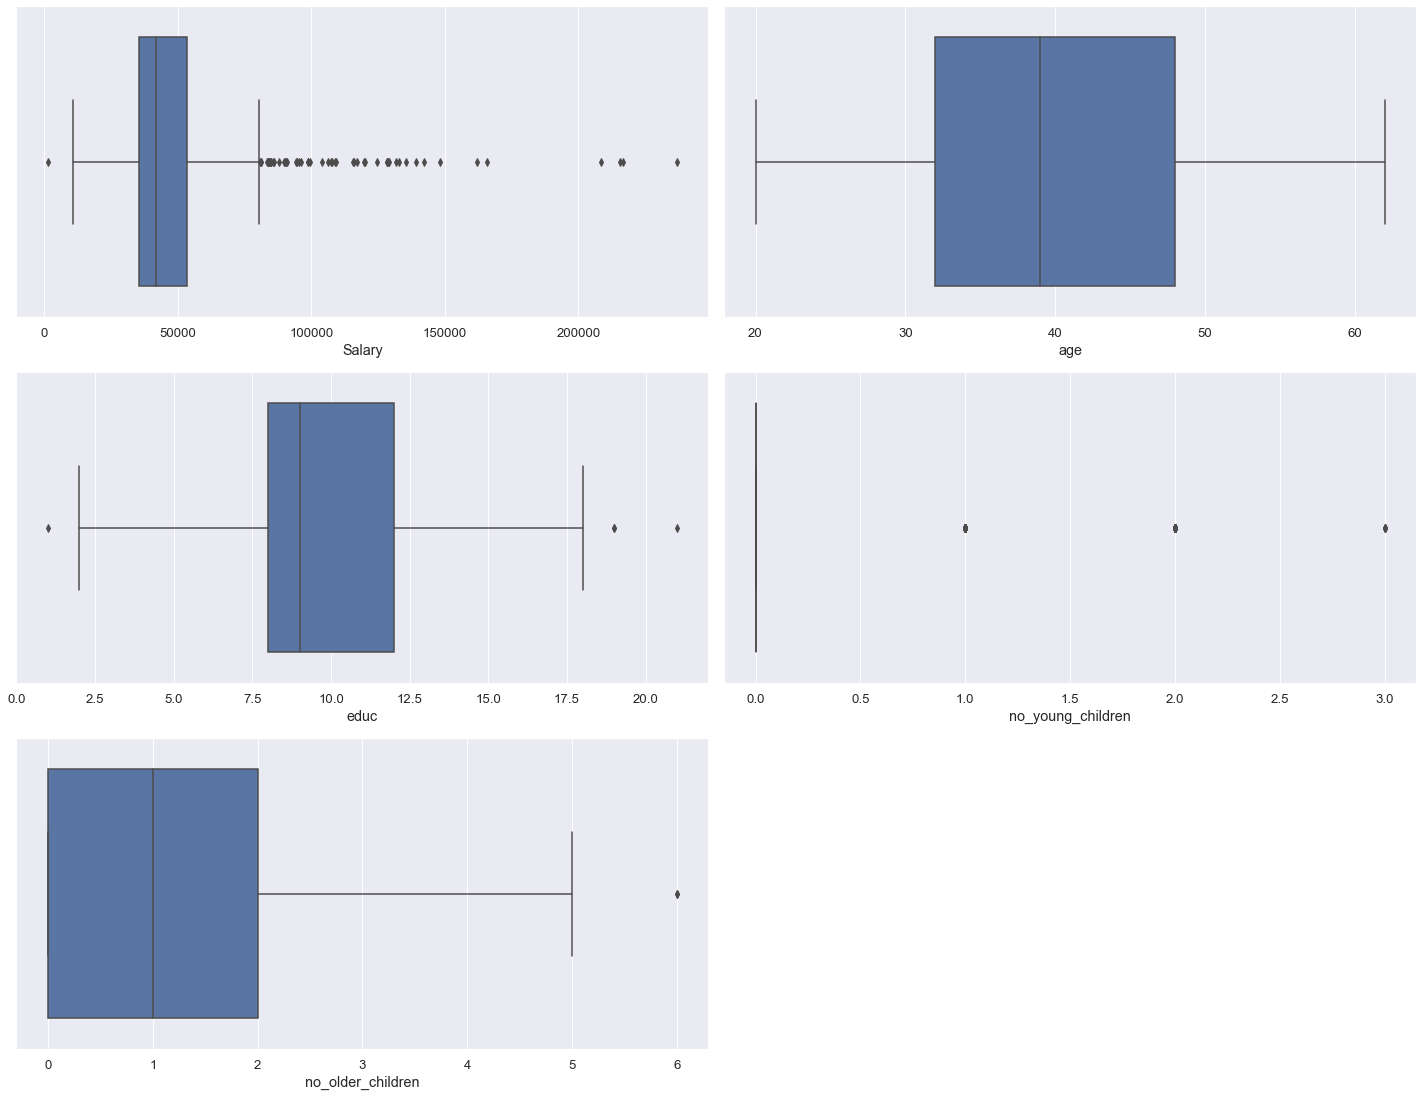

In [100]:
data_plot2=df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(4,2,i+1)
    sns.boxplot(data_plot2[data_plot2.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',df2.shape)

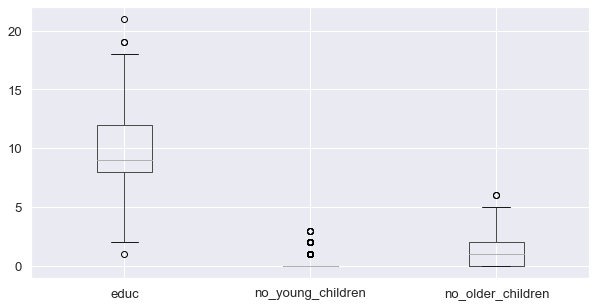

In [101]:
plt.figure(figsize=(10,5))
df2[['educ', 'no_young_children',
       'no_older_children', 'foreign']].boxplot(vert=1)

Above outliers can be neglected

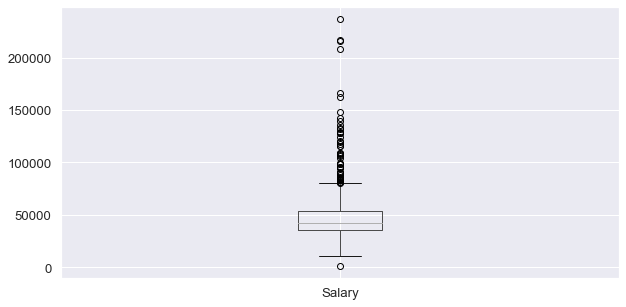

In [102]:
plt.figure(figsize=(10,5))
df2[['Salary' ]].boxplot(vert=1)

We can treat salary outliers

In [103]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [104]:
lr,ur=remove_outlier(df2['Salary'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df2['Salary']=np.where(df2['Salary']>ur,ur,df2['Salary'])
df2['Salary']=np.where(df2['Salary']<lr,lr,df2['Salary'])

Lower Range : 8105.75 
Upper Range : 80687.75


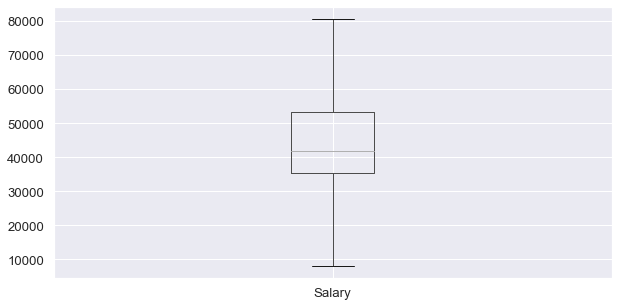

In [105]:
plt.figure(figsize=(10,5))
df2[['Salary' ]].boxplot(vert=1)

## Checking pairwise distribution of the continuous variables

C:\Users\Rachit\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


After Outliers Treatment


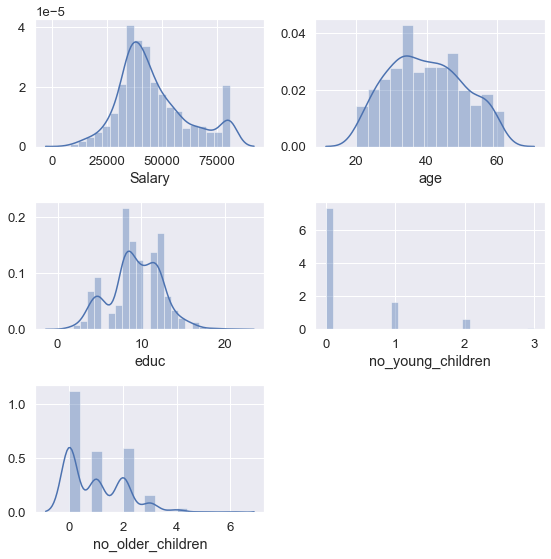

In [106]:
data_plot2=df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']]
fig=plt.figure(figsize=(8,8))
for i in range(0,len(data_plot2.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.distplot(data_plot2[data_plot2.columns[i]])
    plt.tight_layout()
print('After Outliers Treatment')

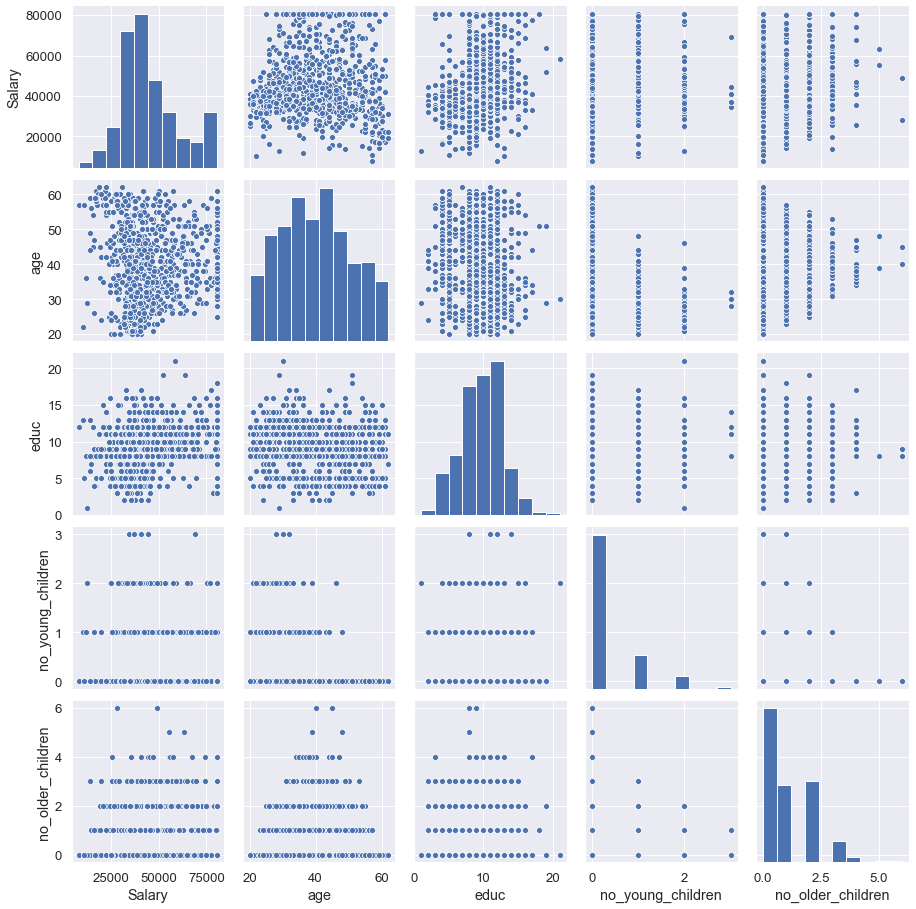

In [107]:
sns.pairplot(df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']])

## Checking for Correlations

In [108]:
df2.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.047029,0.352726,-0.034360,0.121993
age,0.047029,1.000000,-0.149294,-0.519093,-0.116205
educ,0.352726,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.034360,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.121993,-0.116205,-0.036321,-0.238428,1.000000


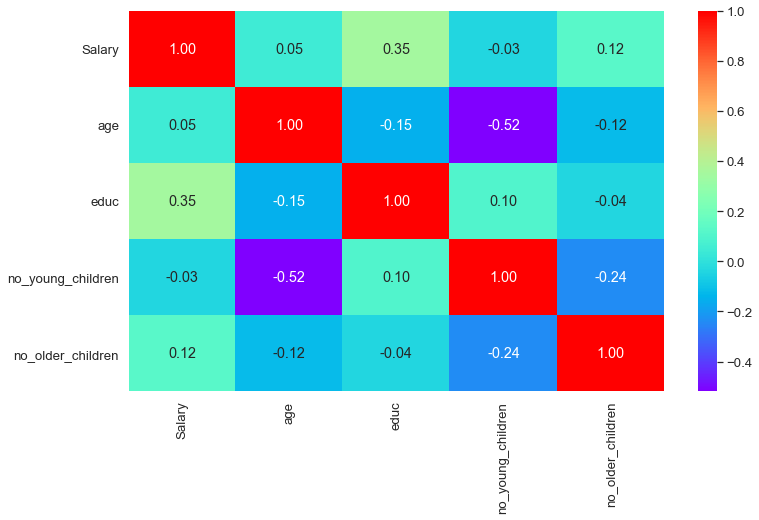

In [109]:
plt.figure(figsize=(12,7))
sns.heatmap(df2[['Salary', 'age', 'educ', 'no_young_children',
       'no_older_children']].corr(),annot=True,fmt='.2f',cmap='rainbow')
plt.show()

In [110]:
df2.Holliday_Package.value_counts(normalize=True)*100

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64

In [111]:
df2.foreign.value_counts(normalize=True)*100

no     75.229358
yes    24.770642
Name: foreign, dtype: float64

## Converting all objects to categorical codes

In [112]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


## Proportion of 1s and 0s

In [113]:
df2.Holliday_Package.value_counts(normalize=True)*100

0    54.013761
1    45.986239
Name: Holliday_Package, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

In [114]:
df2.foreign.value_counts(normalize=True)*100

0    75.229358
1    24.770642
Name: foreign, dtype: float64

## Extracting the target column into separate vectors for training set and test set

In [115]:
X = df2.drop("Holliday_Package" , axis=1)

y = df2.pop("Holliday_Package")

X.head()

,Salary,age,educ,no_young_children,no_older_children,foreign
0,48412.0,30,8,1,1,0
1,37207.0,45,8,0,1,0
2,58022.0,46,9,0,0,0
3,66503.0,31,11,2,0,0
4,66734.0,44,12,0,2,0


## Splitting data into training and test set

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [117]:
train_labels.value_counts(normalize=True)*100

0    53.442623
1    46.557377
Name: Holliday_Package, dtype: float64

In [118]:
test_labels.value_counts(normalize=True)*100

0    55.343511
1    44.656489
Name: Holliday_Package, dtype: float64

0    53.442623
1    46.557377
Name: Holliday_Package, dtype: float64


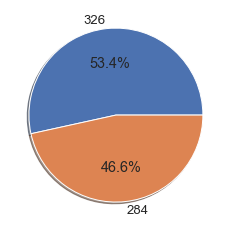

In [119]:
plt.pie(train_labels.value_counts(), labels=train_labels.value_counts().values, autopct='%1.1f%%', shadow=True);
print(train_labels.value_counts(normalize=True)*100)

0    55.343511
1    44.656489
Name: Holliday_Package, dtype: float64


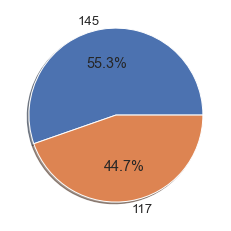

In [120]:
plt.pie(test_labels.value_counts(), labels=test_labels.value_counts().values, autopct='%1.1f%%', shadow=True);
print(test_labels.value_counts(normalize=True)*100)

Since the distribution of values of target variable is verified and found close to equal, it can be concluded that the data set is properly split

## Checking the dimensions of the training and test data

In [121]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (610, 6)
X_test (262, 6)
train_labels (610,)
test_labels (262,)


## Logistic Regression Model with GridSearch

In [122]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, train_labels)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [123]:
grid={'penalty':['elasticnet','l2','none','l1'],
      'solver':['newton-cg','liblinear'],
      'tol':[0.0001,0.00001,0.000001],
      'verbose':[True, False]
      }

In [124]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='f1')

In [125]:
grid_search.fit(X_train, train_labels)

[LibLinear]

C:\Users\Rachit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, n_jobs=2,
                                          penalty='none', solver='newton-cg',
                                          verbose=True),
             n_jobs=-1,
             param_grid={'penalty': ['elasticnet', 'l2', 'none', 'l1'],
                         'solver': ['newton-cg', 'liblinear'],
                         'tol': [0.0001, 1e-05, 1e-06],
                         'verbose': [True, False]},
             scoring='f1')

In [126]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05, 'verbose': True} 

LogisticRegression(max_iter=10000, n_jobs=2, penalty='l1', solver='liblinear',
                   tol=1e-05, verbose=True)


In [127]:
best_model = grid_search.best_estimator_

We apply the grid search to see if we can get better hyperparameters than the one defined initially. After getting the best model, we see that model accuracy on test set has slightly increased

In [128]:
ytrain_predict = model.predict(X_train)

In [129]:
ytest_predict = model.predict(X_test)

## AUC and ROC for the training and test data

In [130]:
# Training Data Probability Prediction
y_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
y_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.742
AUC for the Test Data: 0.705


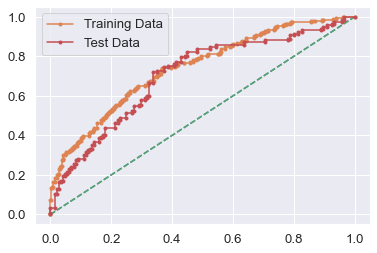

In [131]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(train_labels,y_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,y_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,y_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,y_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Confusion Matrix for the train and test data

training data               precision    recall  f1-score   support

           0       0.67      0.77      0.72       326
           1       0.68      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

testing data               precision    recall  f1-score   support

           0       0.66      0.70      0.68       145
           1       0.60      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



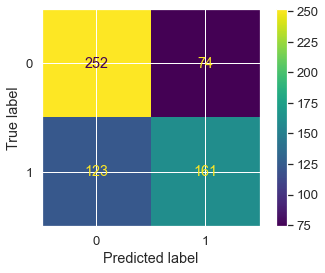

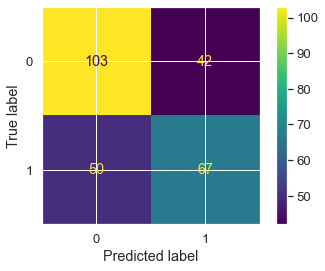

In [132]:
## Confusion matrix on the train data
plot_confusion_matrix(best_model,X_train,train_labels)
print('training data',classification_report(train_labels, ytrain_predict),'\n')

## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,test_labels)
print('testing data',classification_report(test_labels, ytest_predict),'\n');

## Accuracy for the train and test data

In [133]:
#Accuracy - Training Data
model.score(X_train, train_labels)

0.6754098360655738

In [134]:
# best model Accuracy - Training Data
best_model.score(X_train, train_labels)

0.6770491803278689

In [135]:
# Accuracy - Test Data
model.score(X_test, test_labels)

0.6374045801526718

In [136]:
# Best Model Accuracy - Test Data
best_model.score(X_test, test_labels)

0.648854961832061

## LDA model

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [138]:
clf = LinearDiscriminantAnalysis()
ldamodel=clf.fit(X_train,train_labels)

In [139]:
#Accuracy - Training Data
ldamodel.score(X_train, train_labels)

0.6754098360655738

In [140]:
# Accuracy - Test Data
ldamodel.score(X_test, test_labels)

0.6412213740458015

In [141]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = ldamodel.predict(X_train)

In [142]:
# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = ldamodel.predict(X_test)
pred_class_test

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int8)

## LDA model evaluation

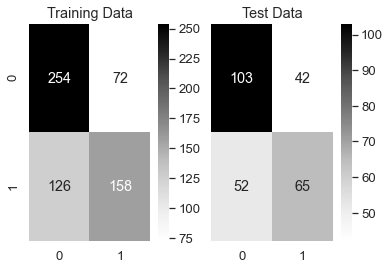

In [143]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(train_labels,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(test_labels,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [144]:
print('Classification Report of the training data:\n\n',metrics.classification_report(train_labels,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(test_labels,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.61       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.66      0.71      0.69       145
           1       0.61      0.56      0.58       117

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.64       262
 



In [145]:
# Training Data Probability Prediction
pred_prob_train = ldamodel.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = ldamodel.predict_proba(X_test)

In [146]:
pred_prob_train[:,1]

array([0.24854905, 0.75202351, 0.05086595, 0.30329566, 0.54677797,
       0.78005142, 0.39773898, 0.26163217, 0.19359003, 0.30016427,
       0.27438154, 0.23699582, 0.35687259, 0.47202148, 0.42613958,
       0.76720336, 0.77898619, 0.13274274, 0.4351178 , 0.8898699 ,
       0.70801993, 0.18223542, 0.21662696, 0.62916337, 0.2540067 ,
       0.29460693, 0.6545642 , 0.3330259 , 0.84968252, 0.29497333,
       0.71390418, 0.79700845, 0.50578166, 0.27130116, 0.32916253,
       0.5446035 , 0.53075922, 0.3155308 , 0.41207466, 0.31240709,
       0.52355591, 0.54407739, 0.30119165, 0.87548739, 0.07012071,
       0.7632985 , 0.6486827 , 0.11647849, 0.0641258 , 0.54824834,
       0.4781157 , 0.22038081, 0.66589833, 0.43064342, 0.89084758,
       0.4537871 , 0.65620914, 0.23856926, 0.68196483, 0.36080283,
       0.33565887, 0.23555113, 0.17830151, 0.11041672, 0.31206593,
       0.34938707, 0.53919946, 0.59339055, 0.16370702, 0.58623581,
       0.60526845, 0.23206855, 0.38128048, 0.7906841 , 0.36944

AUC for the Training Data: 0.739
AUC for the Test Data: 0.703


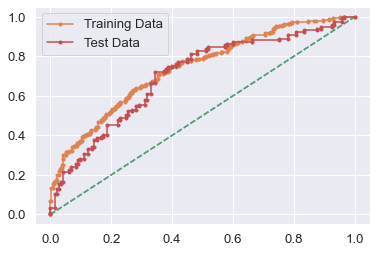

In [147]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(train_labels,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(train_labels,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(test_labels,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(test_labels,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## change the cut-off values for maximum accuracy train

0.1 

Accuracy Score 0.4836
F1 Score 0.6425 

Confusion Matrix


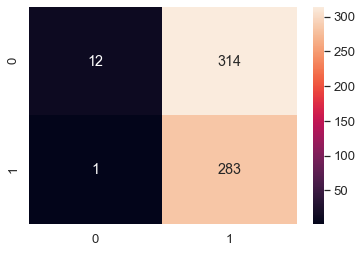

0.2 

Accuracy Score 0.5328
F1 Score 0.6611 

Confusion Matrix


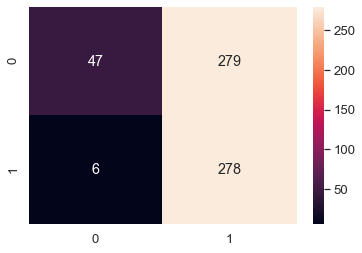

0.3 

Accuracy Score 0.6
F1 Score 0.6755 

Confusion Matrix


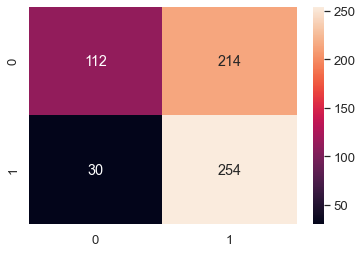

0.4 

Accuracy Score 0.6656
F1 Score 0.6699 

Confusion Matrix


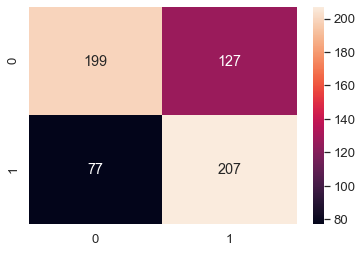

0.5 

Accuracy Score 0.6754
F1 Score 0.6148 

Confusion Matrix


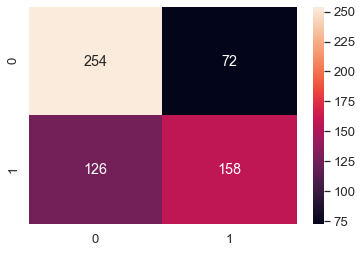

0.6 

Accuracy Score 0.659
F1 Score 0.5378 

Confusion Matrix


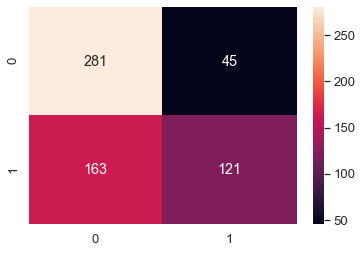

0.7 

Accuracy Score 0.6492
F1 Score 0.4596 

Confusion Matrix


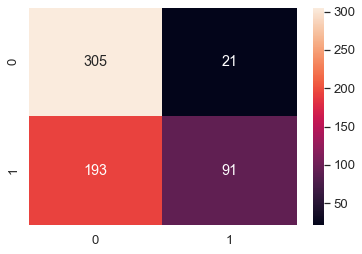

0.8 

Accuracy Score 0.6033
F1 Score 0.2754 

Confusion Matrix


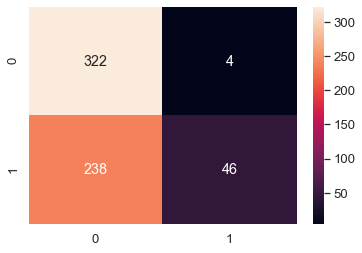

0.9 

Accuracy Score 0.5443
F1 Score 0.0414 

Confusion Matrix


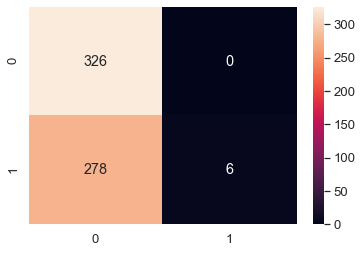

In [148]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(train_labels)):#defining a loop for the length of the train data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            # 0.02069932 > 0.1
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(train_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(train_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(train_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

## change the cut-off values for maximum accuracy test¶

0.1 

Accuracy Score 0.458
F1 Score 0.6162 

Confusion Matrix


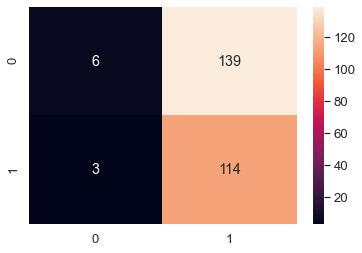

0.2 

Accuracy Score 0.4809
F1 Score 0.618 

Confusion Matrix


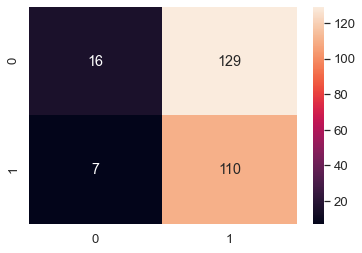

0.3 

Accuracy Score 0.5878
F1 Score 0.6538 

Confusion Matrix


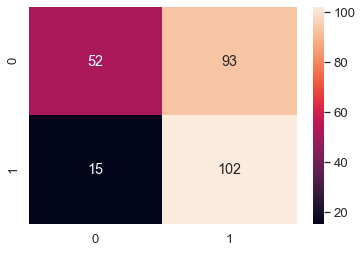

0.4 

Accuracy Score 0.6641
F1 Score 0.6667 

Confusion Matrix


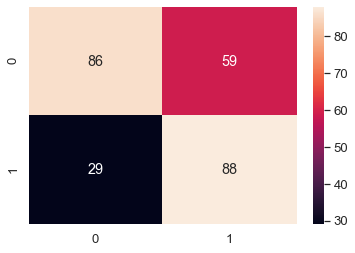

0.5 

Accuracy Score 0.6412
F1 Score 0.5804 

Confusion Matrix


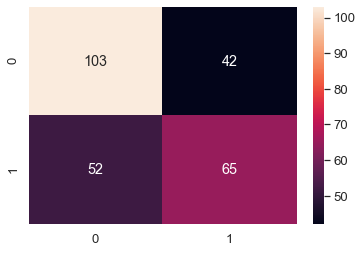

0.6 

Accuracy Score 0.6374
F1 Score 0.5274 

Confusion Matrix


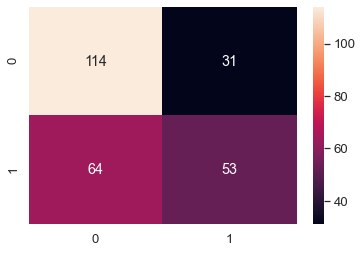

0.7 

Accuracy Score 0.626
F1 Score 0.4167 

Confusion Matrix


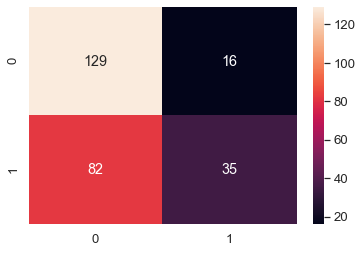

0.8 

Accuracy Score 0.5992
F1 Score 0.2336 

Confusion Matrix


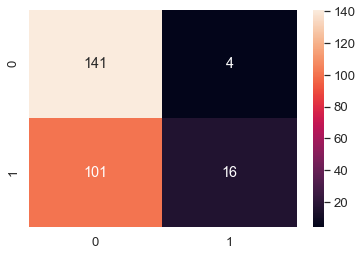

0.9 

Accuracy Score 0.5611
F1 Score 0.0336 

Confusion Matrix


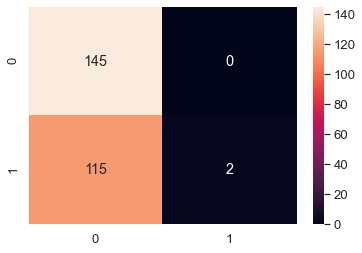

In [149]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(test_labels)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            # 0.02069932 > 0.1
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(test_labels,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(test_labels,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(test_labels,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();